<a href="https://colab.research.google.com/github/HoYoung1/NLPStudy/blob/main/3_%EA%B5%B0%EC%A7%91_%EB%B6%84%EC%84%9D(Cluster_Anlysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 군집 분석(Cluster Anlysis)

Reference : https://www.youtube.com/watch?v=YJSHBQj8zbU&list=PL7ZVZgsnLwEEoHQAElEPg7l7T6nt25I3N&index=3

- 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
- 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
- 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

## 텍스트 유사도

- 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
- 자카드 유사도(Jaccard Similarity): 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용
- 코사인 유사도(Cosine Similarity): 벡터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 벡터 표현으로 활용 가능

In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
def jaccard_similarity(d1, d2):
  lemmatizer = WordNetLemmatizer()

  words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
  words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]

  inter = len(set(words1).intersection(set(words2)))
  union = len(set(words1).union(words2))

  return inter/union

In [3]:
d1 = "Think like a man off action and act like man of thought."
d2 = "Try no to become a man of success but rather try to become a man of value"
d3 = "Give me liberty, of give me death"

print(jaccard_similarity(d1, d2))
print(jaccard_similarity(d1, d3))
print(jaccard_similarity(d2, d3))

0.15789473684210525
0.0625
0.0625


In [4]:
tiv = TfidfVectorizer()
corpus = [d1, d2, d3]

tfidf = tiv.fit_transform(corpus).todense()

print(cosine_similarity(tfidf[0], tfidf[1]))
print(cosine_similarity(tfidf[0], tfidf[2]))
print(cosine_similarity(tfidf[1], tfidf[2]))

[[0.18595598]]
[[0.03047239]]
[[0.04765587]]


## 한국어 형태소 분석기 설치

In [5]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 37.6 MB/s 
     |████████████████████████████████| 86 kB 5.2 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [6]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Installing automake (A dependency for mecab-ko)
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Pac

## 데이터 전처리
- https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [7]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [8]:
raw = [x.decode() for x in raw[1:10000]]

reviews = []
for i in raw:
  reviews.append(i.split('\t')[1])

print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


In [9]:
from konlpy.tag import Mecab

tagger = Mecab()
reviews = [tagger.morphs(x) for x in reviews]

print(reviews)

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해', '가', '는', '문화', '산업', '이', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '에', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['와', '.', '.', '연기', '가', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.'], ['사랑', '을', '해', '본', '사람', '이', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '는', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '들', '의', '전쟁', '2', '나오', '나요', '?', '나오', '면', '1', '빠', '로', '보', '고', '싶', '음'

## Word2Vec 생성
- word2vec 생성에 필요한 라이브러리들을 추가


In [12]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

- Word2Vec 모델을 생성
- gensim 의 Word2Vec 은 선언과 동시에 학습을 해 단어 벡터들을 생성

In [14]:
word2vec = Word2Vec(reviews, min_count=5)
word2vec

In [15]:
word2vec.most_similar('영화')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('작품', 0.9595686197280884),
 ('마음', 0.9577367305755615),
 ('이야기', 0.9547368884086609),
 ('듯', 0.9540086984634399),
 ('방법', 0.9472107887268066),
 ('따뜻', 0.9465446472167969),
 ('내', 0.9448268413543701),
 ('가슴', 0.9372008442878723),
 ('잔잔', 0.9370166063308716),
 ('이런', 0.9362155199050903)]

- t-sne을 이용한 단어 벡터 시각화

In [16]:
tsne = TSNE(n_components=2)
tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)

In [17]:
vocab = word2vec.wv.vocab
similarity = word2vec[vocab]
similarity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[-0.120505  , -0.14951906, -0.14586958, ..., -0.16967516,
         0.16456023,  0.01629875],
       [-0.4065556 , -0.4725957 , -0.272663  , ..., -0.45733663,
         0.37570003,  0.26599193],
       [-0.627694  , -0.38148293, -0.25379908, ..., -0.40983915,
         0.6376554 ,  0.304537  ],
       ...,
       [-0.01784921, -0.01133018, -0.01739435, ..., -0.01502718,
         0.0230636 ,  0.00452754],
       [-0.01155237, -0.02006268, -0.02756331, ..., -0.02926523,
         0.02824574, -0.00278652],
       [-0.01670763, -0.02198782, -0.01232258, ..., -0.02533961,
         0.03224741,  0.00964707]], dtype=float32)

In [18]:
import pandas as pd

transform_similarity = tsne.fit_transform(similarity)
df = pd.DataFrame(transform_similarity, index=vocab, columns=['x', 'y'])
df[0:10]

,x,y
어릴,-25.289381,-16.475563
때,-54.822578,13.820992
보,-63.603153,19.089437
고,-63.801208,17.597227
지금,-61.956173,14.955541
다시,-63.943298,16.516155
봐도,-64.721443,15.866757
재밌,-67.327858,1.368767
어요,-66.208130,0.707781
ㅋㅋ,-65.198242,-1.619666


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


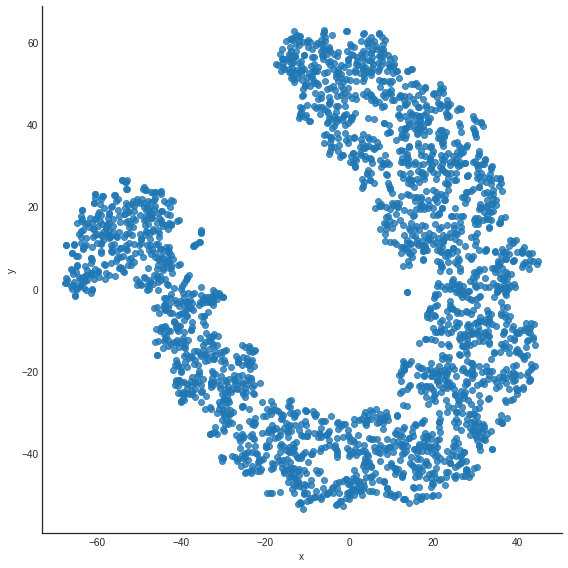

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

sns.lmplot('x', 'y', data=df, fit_reg=False, size=8)
plt.show()

## Sciket-learn, Scipy를 이용한 계층적 군집화
- 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
- 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점
- 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼

## Scikit-learn
- 비계층적 군집화의 일종인 agglomerativeClustering(병합 군집)을 이용, 계층적 군집화 실습
- 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
- 병합 군집의 종료 조건에는 3가지를 지정 가능
  1. ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)
  1. average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침
  1. complete - 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침
- scikit-learn 사용예제에서는 종료 조건 간의 차이를 비교

### ward

In [22]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=6, linkage='ward')
predict = ward.fit_predict(df)
predict

array([3, 5, 5, ..., 2, 2, 2])

In [23]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,-25.289381,-16.475563,3
때,-54.822578,13.820992,5
보,-63.603153,19.089437,5
고,-63.801208,17.597227,5
지금,-61.956173,14.955541,5
다시,-63.943298,16.516155,5
봐도,-64.721443,15.866757,5
재밌,-67.327858,1.368767,5
어요,-66.208130,0.707781,5
ㅋㅋ,-65.198242,-1.619666,5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


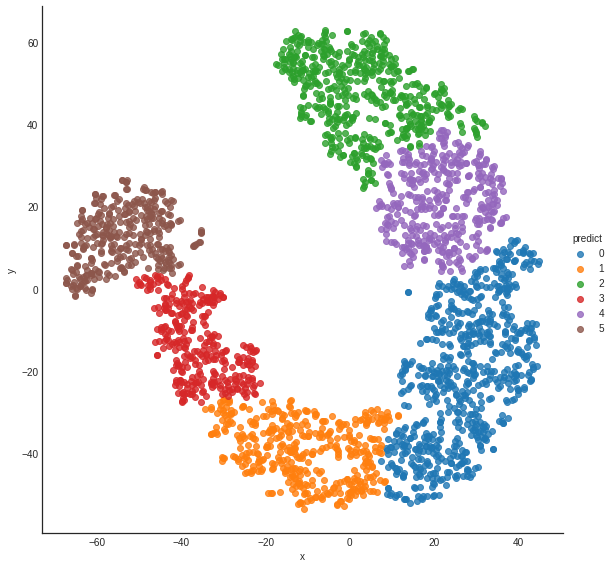

In [25]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=8, hue='predict')
plt.show()

### average

In [27]:
avg = AgglomerativeClustering(n_clusters=6, linkage='average')
predict = avg.fit_predict(df)
predict

array([3, 5, 5, ..., 1, 1, 1])

In [28]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,-25.289381,-16.475563,3
때,-54.822578,13.820992,5
보,-63.603153,19.089437,5
고,-63.801208,17.597227,5
지금,-61.956173,14.955541,5
다시,-63.943298,16.516155,5
봐도,-64.721443,15.866757,5
재밌,-67.327858,1.368767,5
어요,-66.208130,0.707781,5
ㅋㅋ,-65.198242,-1.619666,5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


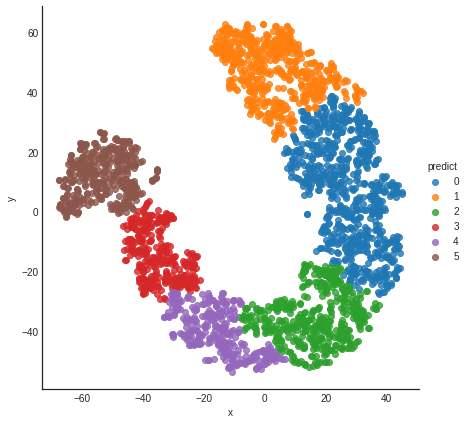

In [30]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')
plt.show()

### complete

In [31]:
compl = AgglomerativeClustering(n_clusters=6, linkage='complete')
predict = compl.fit_predict(df)
predict

array([0, 0, 0, ..., 2, 2, 2])

In [32]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,-25.289381,-16.475563,0
때,-54.822578,13.820992,0
보,-63.603153,19.089437,0
고,-63.801208,17.597227,0
지금,-61.956173,14.955541,0
다시,-63.943298,16.516155,0
봐도,-64.721443,15.866757,0
재밌,-67.327858,1.368767,0
어요,-66.208130,0.707781,0
ㅋㅋ,-65.198242,-1.619666,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


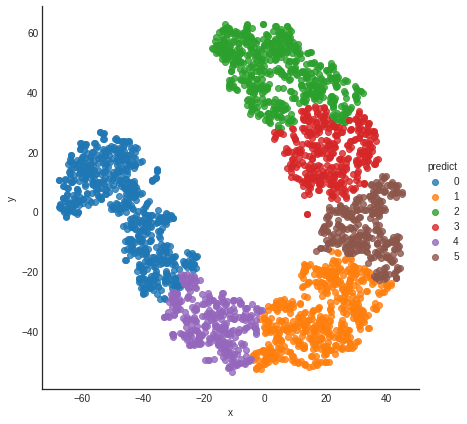

In [33]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')
plt.show()

## Scipy
- scipy를 이용한 거리 사용과 word2vec 사용을 비교
- pdist를 이용한 각 단어간 유클리디안 거리 계산

In [36]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

distmatrix = pdist(df, metric='euclidean')
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,2622,2623,2624,2625,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638
0,0.000000,42.309467,52.276327,51.420967,48.294595,50.819079,50.999149,45.668957,44.380303,42.584209,47.422274,41.417165,47.159394,60.018672,42.210234,44.003555,64.931938,42.115211,45.207556,45.198850,45.906654,79.083394,39.493296,50.541762,51.398014,45.125115,39.109705,44.195102,47.895730,19.129126,43.213517,30.044708,43.488038,47.305142,67.452930,32.726278,43.472645,41.762205,39.560249,37.963199,...,72.567878,65.548554,57.992060,77.694453,61.060914,77.628091,56.142445,56.265070,65.462725,70.820997,65.724116,67.917159,57.989459,70.601048,57.949497,76.823221,61.039853,78.234481,67.776568,60.128258,78.320611,68.577347,55.076972,26.544096,56.924812,65.004280,63.791558,61.135530,57.740955,71.129099,67.603475,70.069333,55.651994,82.722896,71.229905,63.635403,63.514447,71.179072,74.672119,76.970312
1,42.309467,0.000000,10.239874,9.740419,7.223252,9.510596,10.108050,17.647660,17.366262,18.602912,12.366401,13.331446,11.942004,99.250911,10.627265,13.708920,92.367101,13.170342,12.912706,12.489324,9.202654,67.514963,80.926013,92.130906,9.524183,9.596209,80.767489,16.163883,12.361344,30.157188,8.516246,13.237758,10.469039,5.205496,78.950423,9.989953,11.349208,1.405008,3.303849,78.521584,...,71.834987,78.357692,60.995193,63.639265,52.264264,70.821541,76.274530,73.010780,76.138338,57.765515,91.284668,73.001640,64.648804,55.901137,71.096188,70.349567,70.801566,74.167899,57.083581,56.139969,66.683979,58.880751,58.269610,68.667042,76.895615,63.307563,62.112836,63.770675,74.190064,83.183586,81.612382,67.253026,77.414741,76.406064,76.738134,57.287629,59.461090,57.412099,62.644859,62.528441
2,52.276327,10.239874,0.000000,1.505297,4.449904,2.595666,3.411193,18.107888,18.565322,20.770443,15.746035,20.235741,15.459071,109.484326,17.353802,19.340770,101.810195,19.760798,17.845102,17.409457,13.451497,70.974568,90.468983,102.301868,5.818449,14.493463,90.383338,17.462527,10.710099,38.687849,14.856443,23.465761,16.464705,6.449514,86.618588,20.229707,17.310911,10.552170,13.425569,87.847524,...,77.584990,86.237432,67.949748,66.638293,57.360558,75.295453,85.165074,81.568168,83.758793,61.392508,100.544941,79.805006,72.047838,59.204019,79.230852,74.921972,78.451074,79.119183,61.370443,62.033573,70.167821,63.298996,65.401030,78.598247,85.754688,69.256204,68.127882,70.522875,82.679612,90.828137,89.585868,72.775731,86.466767,80.760024,83.486804,62.595110,65.134917,60.869847,66.244869,65.483199
3,51.420967,9.740419,1.505297,0.000000,3.222214,1.090370,1.959938,16.607233,17.060089,19.267608,16.512862,20.608467,16.201042,108.940722,17.703974,19.889569,101.769660,20.175529,18.461979,18.018758,14.030870,72.007259,89.444328,101.564760,6.930474,15.025629,89.380193,15.957553,9.213411,37.504368,15.198560,22.961030,16.902611,6.672754,87.040122,19.675517,17.773571,9.862628,13.010387,86.767790,...,78.330812,86.614086,68.492080,67.715957,58.175747,76.212960,85.296814,81.786283,84.187530,62.395656,100.567409,80.384049,72.512321,60.240145,79.547694,75.826744,78.870426,79.978331,62.295851,62.741724,71.197044,64.210708,65.908997,77.718894,85.895449,69.964500,68.824850,71.102940,82.915187,91.256701,89.944184,73.550400,86.552466,81.696916,84.077878,63.388821,65.879554,61.891247,67.256985,66.564206
4,48.294595,7.223252,4.449904,3.222214,0.000000,2.526695,2.911535,14.610114,14.868685,16.889301,16.288782,19.406800,15.925488,106.072255,16.511299,19.081001,99.577108,19.069699,17.836282,17.385572,13.447323,72.151370,86.237706,98.515560,8.111488,14.300380,86.179773,13.700716,7.509788,34.289186,14.055610,20.224491,15.915599,5.920254,85.689832,16.896162,16.819022,7.044220,10.520796,83.551089,...,77.708327,85.174611,67.416940,67.999794,57.756631,76.029700,83.400230,80.047810,82.855

- 각 단어간 유킬리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

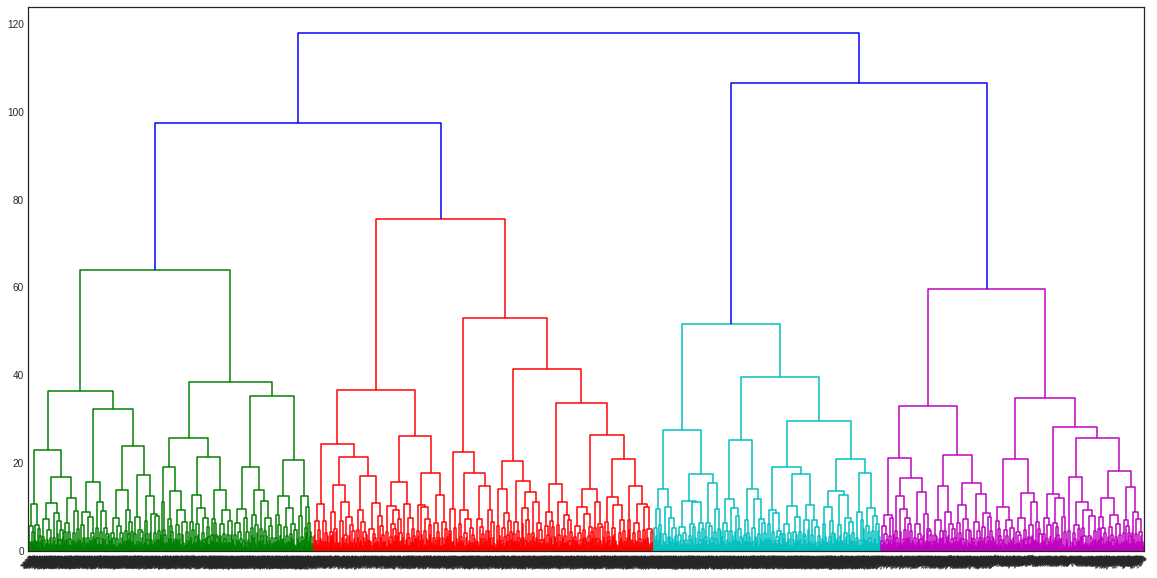

In [37]:
row_clusters = linkage(distmatrix, method='complete')

plt.figure(figsize=(20, 10))
dendrogram(row_clusters,
           leaf_rotation=50,
           leaf_font_size=7)
plt.show()

- word2vec을 이용한 군집 분석 및 덴드로그램 시각화

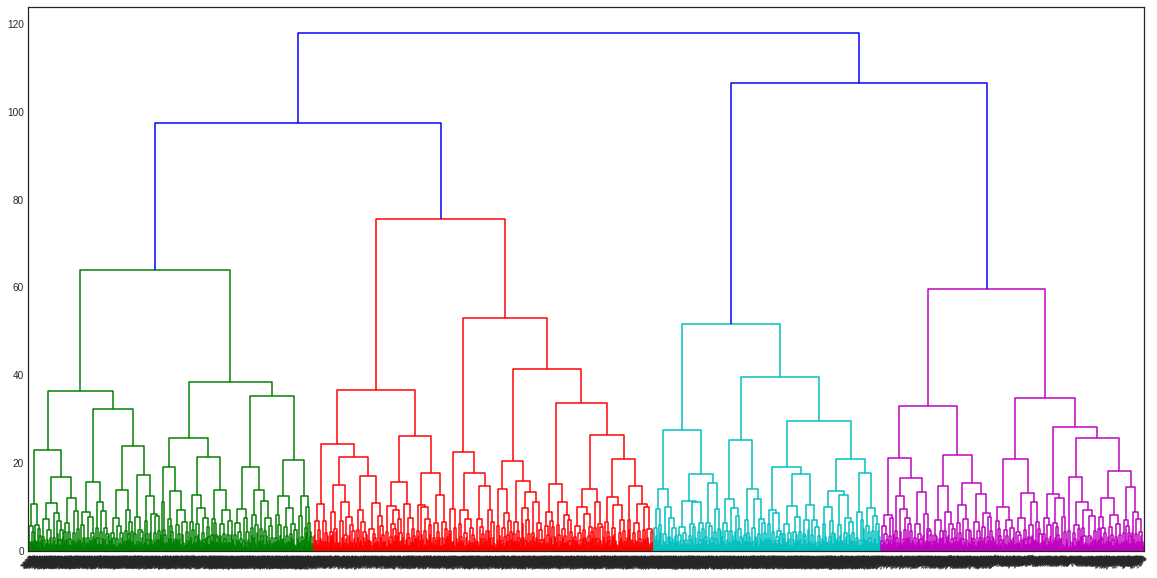

In [39]:
mergings = linkage(df, method='complete')

plt.figure(figsize=(20, 10))
dendrogram(mergings,
           leaf_rotation=50,
           leaf_font_size=7)
plt.show()

## Scikit-learn을 이용한 비계층적 군집화
- 비계층적 군집화는 나눌 클러스터 개수를 지정해 각 개체가 어느 클러스터에 속하는 지를 결정
- 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, 클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요

- 대표적인 비계층적 군집화 알고리즘인 kmeans를 사용해 실습

## 클러스터 개수 3

In [40]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
predict = kmeans.fit_predict(df)
predict

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [41]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,-25.289381,-16.475563,0
때,-54.822578,13.820992,0
보,-63.603153,19.089437,0
고,-63.801208,17.597227,0
지금,-61.956173,14.955541,0
다시,-63.943298,16.516155,0
봐도,-64.721443,15.866757,0
재밌,-67.327858,1.368767,0
어요,-66.208130,0.707781,0
ㅋㅋ,-65.198242,-1.619666,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


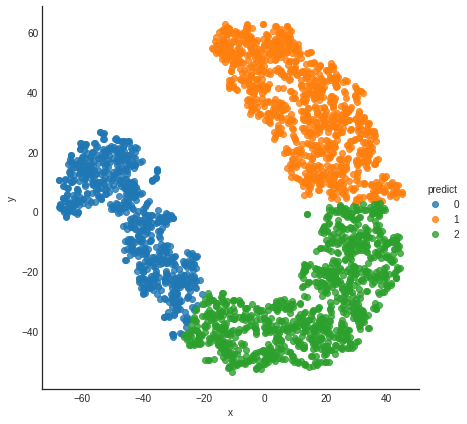

In [42]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')
plt.show()

## 클러스터 개수 6

In [43]:
kmeans = KMeans(n_clusters=6)
predict = kmeans.fit_predict(df)
predict

array([1, 4, 4, ..., 0, 0, 0], dtype=int32)

In [45]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,-25.289381,-16.475563,1
때,-54.822578,13.820992,4
보,-63.603153,19.089437,4
고,-63.801208,17.597227,4
지금,-61.956173,14.955541,4
다시,-63.943298,16.516155,4
봐도,-64.721443,15.866757,4
재밌,-67.327858,1.368767,4
어요,-66.208130,0.707781,4
ㅋㅋ,-65.198242,-1.619666,4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


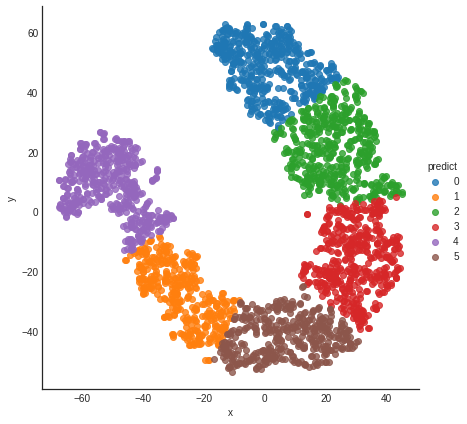

In [46]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')
plt.show()